<a href="https://colab.research.google.com/github/gwu2/Projects/blob/master/House_Price_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction** 

In this project, I will build a regresson model to predict house price based on the following attributes: number of bedrooms, number of bathrooms, square feet of its living room, square feet of the whole house, floors, wether it has a waterfront, the view (based on a scale of 1-5), the condition( based on a scale of 1-5), the square foot of its basement, the year it was built, the year it was renovated, and the location of the house.

Data Source: [Kaggle](https://www.kaggle.com/grikomsn/amazon-cell-phones-reviews) by user *Griko Nibras*

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

**STEP 1: Import Data**

In [0]:
url = 'https://raw.githubusercontent.com/gwu2/660/master/House%20Price.csv'

df = pd.read_csv(url)

In [0]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,5/5/2014 0:00,245000.0,3,1.75,1920,9306,1.0,0,0,3,1000,920,1984,0,30001-30021 55th Pl S,Auburn,98001,USA
1,5/6/2014 0:00,360000.0,4,2.00,2680,18768,1.0,0,0,5,2680,0,1965,0,31607-31633 44th Ave S,Auburn,98001,USA
2,5/6/2014 0:00,197000.0,3,1.75,1690,7735,1.0,0,0,4,1060,630,1976,1992,30020 43rd Pl S,Auburn,98001,USA
3,5/7/2014 0:00,100000.0,2,1.00,910,22000,1.0,0,0,3,910,0,1956,2001,138 Seattle Blvd S,Algona,98001,USA
4,5/7/2014 0:00,280000.0,3,2.50,1600,4271,2.0,0,0,3,1600,0,2000,0,5146 S 303rd Pl,Auburn,98001,USA


**STEP 2: Set Up Columns.**

My object is to create a linear regression model that predicts the price. However, some variables in the dataset are not ready to be used in a linear regression model. Let's transform those variables first. Here is the summary of what I will do in this step:

1. The year the house was built is not a good representation of how old the house is. I will transform it to age of the house.

2. The year the house was renovated is not really a quantative variable. I'll transform it into a binary variable that '1' represents it has been renovated, and '0' represents not. 

3. street, city, zipcode and country are all presenting location imformation. I will keep the zipcode and get rid of everything else. Zipcode is not a quantative variable. I'll transform it into many categorical variables as well.


**1. 'age' column**

In [0]:
df['age'] = df['yr_built']
for i in range(len(df['yr_built'])):
  df['age'][i] = 2014 - df["yr_built"][i]
df = df.drop(['yr_built'], axis = 1)                      # now drop the yr_built column
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_renovated,street,city,statezip,country,age
0,5/5/2014 0:00,245000.0,3,1.75,1920,9306,1.0,0,0,3,1000,920,0,30001-30021 55th Pl S,Auburn,98001,USA,30
1,5/6/2014 0:00,360000.0,4,2.00,2680,18768,1.0,0,0,5,2680,0,0,31607-31633 44th Ave S,Auburn,98001,USA,49
2,5/6/2014 0:00,197000.0,3,1.75,1690,7735,1.0,0,0,4,1060,630,1992,30020 43rd Pl S,Auburn,98001,USA,38
3,5/7/2014 0:00,100000.0,2,1.00,910,22000,1.0,0,0,3,910,0,2001,138 Seattle Blvd S,Algona,98001,USA,58
4,5/7/2014 0:00,280000.0,3,2.50,1600,4271,2.0,0,0,3,1600,0,0,5146 S 303rd Pl,Auburn,98001,USA,14


**2. 'renovated' column**

In [0]:
df['renovated'] = df['yr_renovated']
for i in range(len(df['renovated'])):
  if df['yr_renovated'][i] >1:
    df['renovated'][i] = 1
df = df.drop(['yr_renovated'], axis = 1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,street,city,statezip,country,age,renovated
0,5/5/2014 0:00,245000.0,3,1.75,1920,9306,1.0,0,0,3,1000,920,30001-30021 55th Pl S,Auburn,98001,USA,30,0
1,5/6/2014 0:00,360000.0,4,2.00,2680,18768,1.0,0,0,5,2680,0,31607-31633 44th Ave S,Auburn,98001,USA,49,0
2,5/6/2014 0:00,197000.0,3,1.75,1690,7735,1.0,0,0,4,1060,630,30020 43rd Pl S,Auburn,98001,USA,38,1
3,5/7/2014 0:00,100000.0,2,1.00,910,22000,1.0,0,0,3,910,0,138 Seattle Blvd S,Algona,98001,USA,58,1
4,5/7/2014 0:00,280000.0,3,2.50,1600,4271,2.0,0,0,3,1600,0,5146 S 303rd Pl,Auburn,98001,USA,14,0


**3. set up dummy variables for zipcode**

In [0]:
#dropping unrelated columns
df2 = df.drop(['street','city','country'] ,axis=1)
df = df2
df.tail()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,statezip,age,renovated
4595,5/8/2014 0:00,134000.0,2,1.50,980,5000,2.0,0,0,3,980,0,98288,92,1
4596,6/27/2014 0:00,415000.0,3,2.75,2600,64626,1.5,0,0,3,2600,0,98288,5,0
4597,7/9/2014 0:00,150000.0,3,0.75,490,38500,1.5,0,0,4,490,0,98288,55,0
4598,6/6/2014 0:00,320000.0,3,1.75,1370,9900,1.0,0,0,4,1370,0,98354,31,0
4599,7/8/2014 0:00,250000.0,3,1.75,1140,10400,1.0,0,0,4,1140,0,98354,31,0


In [0]:
# sort by zipcode then categorize the same zipcode into one group
import matplotlib.pyplot as plt
df['zip'] = df['statezip']
df.sort_values(by=['statezip'])
for i in range(len(df['statezip'])-1):
  df['zip'][0] = 1
  if df['statezip'][i+1] == df['statezip'][i]:
    df['zip'] [i+1]= df['zip'][i]
  else:
    df['zip'][i+1] = int(df['zip'][i])+1 
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,statezip,age,renovated,zip
0,5/5/2014 0:00,245000.0,3,1.75,1920,9306,1.0,0,0,3,1000,920,98001,30,0,1
1,5/6/2014 0:00,360000.0,4,2.00,2680,18768,1.0,0,0,5,2680,0,98001,49,0,1
2,5/6/2014 0:00,197000.0,3,1.75,1690,7735,1.0,0,0,4,1060,630,98001,38,1,1
3,5/7/2014 0:00,100000.0,2,1.00,910,22000,1.0,0,0,3,910,0,98001,58,1,1
4,5/7/2014 0:00,280000.0,3,2.50,1600,4271,2.0,0,0,3,1600,0,98001,14,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,5/8/2014 0:00,134000.0,2,1.50,980,5000,2.0,0,0,3,980,0,98288,92,1,76
4596,6/27/2014 0:00,415000.0,3,2.75,2600,64626,1.5,0,0,3,2600,0,98288,5,0,76
4597,7/9/2014 0:00,150000.0,3,0.75,490,38500,1.5,0,0,4,490,0,98288,55,0,76
4598,6/6/2014 0:00,320000.0,3,1.75,1370,9900,1.0,0,0,4,1370,0,98354,31,0,77


In [0]:
#There are 77 different kind of zipcode. So we have to create 76 dummy variables. The reference zipcode group would be the 77th one.
df['zip_1'] = df['zip']
for i in range(len(df['zip'])):
  df['zip_1'][i] = 0
for i in range(2,77):
  df['zip_'+str(i)] = df['zip_1']
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,statezip,age,renovated,zip,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8,zip_9,zip_10,zip_11,zip_12,zip_13,zip_14,zip_15,zip_16,zip_17,zip_18,zip_19,zip_20,zip_21,zip_22,zip_23,zip_24,...,zip_37,zip_38,zip_39,zip_40,zip_41,zip_42,zip_43,zip_44,zip_45,zip_46,zip_47,zip_48,zip_49,zip_50,zip_51,zip_52,zip_53,zip_54,zip_55,zip_56,zip_57,zip_58,zip_59,zip_60,zip_61,zip_62,zip_63,zip_64,zip_65,zip_66,zip_67,zip_68,zip_69,zip_70,zip_71,zip_72,zip_73,zip_74,zip_75,zip_76
0,5/5/2014 0:00,245000.0,3,1.75,1920,9306,1.0,0,0,3,1000,920,98001,30,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5/6/2014 0:00,360000.0,4,2.00,2680,18768,1.0,0,0,5,2680,0,98001,49,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5/6/2014 0:00,197000.0,3,1.75,1690,7735,1.0,0,0,4,1060,630,98001,38,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5/7/2014 0:00,100000.0,2,1.00,910,22000,1.0,0,0,3,910,0,98001,58,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5/7/2014 0:00,280000.0,3,2.50,1600,4271,2.0,0,0,3,1600,0,98001,14,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,5/8/2014 0:00,134000.0,2,1.50,980,5000,2.0,0,0,3,980,0,98288,92,1,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4596,6/27/2014 0:00,415000.0,3,2.75,2600,64626,1.5,0,0,3,2600,0,98288,5,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4597,7/9/2014 0:00,150000.0,3,0.75,490,38500,1.5,0,0,4,490,0,98288,55,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4598,6/6/2014 0:00,320000.0,3,1.75,1370,9900,1.0,0,0,4,1370,0,98354,31,0,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
for i in range(len(df['zip'])):
  if df['zip'][i] < 77:                                              # We don't need a column of zip_77. It's the reference category. 
    df['zip_'+str(df['zip'][i])][i] = 1
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,statezip,age,renovated,zip,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8,zip_9,zip_10,zip_11,zip_12,zip_13,zip_14,zip_15,zip_16,zip_17,zip_18,zip_19,zip_20,zip_21,zip_22,zip_23,zip_24,...,zip_37,zip_38,zip_39,zip_40,zip_41,zip_42,zip_43,zip_44,zip_45,zip_46,zip_47,zip_48,zip_49,zip_50,zip_51,zip_52,zip_53,zip_54,zip_55,zip_56,zip_57,zip_58,zip_59,zip_60,zip_61,zip_62,zip_63,zip_64,zip_65,zip_66,zip_67,zip_68,zip_69,zip_70,zip_71,zip_72,zip_73,zip_74,zip_75,zip_76
0,5/5/2014 0:00,245000.0,3,1.75,1920,9306,1.0,0,0,3,1000,920,98001,30,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5/6/2014 0:00,360000.0,4,2.00,2680,18768,1.0,0,0,5,2680,0,98001,49,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,5/6/2014 0:00,197000.0,3,1.75,1690,7735,1.0,0,0,4,1060,630,98001,38,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,5/7/2014 0:00,100000.0,2,1.00,910,22000,1.0,0,0,3,910,0,98001,58,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,5/7/2014 0:00,280000.0,3,2.50,1600,4271,2.0,0,0,3,1600,0,98001,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,5/8/2014 0:00,134000.0,2,1.50,980,5000,2.0,0,0,3,980,0,98288,92,1,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4596,6/27/2014 0:00,415000.0,3,2.75,2600,64626,1.5,0,0,3,2600,0,98288,5,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4597,7/9/2014 0:00,150000.0,3,0.75,490,38500,1.5,0,0,4,490,0,98288,55,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4598,6/6/2014 0:00,320000.0,3,1.75,1370,9900,1.0,0,0,4,1370,0,98354,31,0,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
# Now we should drop the column'statezip' and 'zip'. However, I need the 'zip' column to study for the significance of zipcode's effect on price of the house. 
# So I will keep it for now. If the zipcode is important, we will need the statezip column to make a dictionary. So for now, I will keep it as well.
# In addition, before we make a dictionary that help us remember zip 1 -77 represents what zipcode, let's first find out if zipcode's effect on price is weither
# significant or not.

**STEP 3. Choosing the Right Columns**

In this step, I will find out the variables that are significantly affecting the price of the house, and remove the ones that are not significant.

1. the date that the house was sold does not really matter. The oldest and newest date has a difference of 60 days. House price doesn't change that enough in such a short period


In [0]:
df = df.drop(['date'], axis = 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,statezip,age,renovated,zip,zip_1,zip_2,zip_3,zip_4,zip_5,zip_6,zip_7,zip_8,zip_9,zip_10,zip_11,zip_12,zip_13,zip_14,zip_15,zip_16,zip_17,zip_18,zip_19,zip_20,zip_21,zip_22,zip_23,zip_24,zip_25,...,zip_37,zip_38,zip_39,zip_40,zip_41,zip_42,zip_43,zip_44,zip_45,zip_46,zip_47,zip_48,zip_49,zip_50,zip_51,zip_52,zip_53,zip_54,zip_55,zip_56,zip_57,zip_58,zip_59,zip_60,zip_61,zip_62,zip_63,zip_64,zip_65,zip_66,zip_67,zip_68,zip_69,zip_70,zip_71,zip_72,zip_73,zip_74,zip_75,zip_76
0,245000.0,3,1.75,1920,9306,1.0,0,0,3,1000,920,98001,30,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,360000.0,4,2.00,2680,18768,1.0,0,0,5,2680,0,98001,49,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,197000.0,3,1.75,1690,7735,1.0,0,0,4,1060,630,98001,38,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,100000.0,2,1.00,910,22000,1.0,0,0,3,910,0,98001,58,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,280000.0,3,2.50,1600,4271,2.0,0,0,3,1600,0,98001,14,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,134000.0,2,1.50,980,5000,2.0,0,0,3,980,0,98288,92,1,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4596,415000.0,3,2.75,2600,64626,1.5,0,0,3,2600,0,98288,5,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4597,150000.0,3,0.75,490,38500,1.5,0,0,4,490,0,98288,55,0,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4598,320000.0,3,1.75,1370,9900,1.0,0,0,4,1370,0,98354,31,0,77,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


2. Now I will study the zipcodes

In [0]:
import matplotlib.pyplot as plt
from pandas import *
import pandas as pd
from sklearn import datasets
%matplotlib inline

plt.style.use('ggplot')

Text(0, 0.5, 'price')

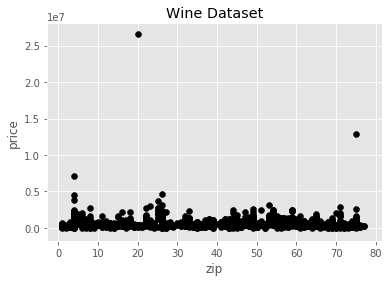

In [0]:
# create a figure and axis
fig,ax = plt.subplots()
# plot each data-point
for i in range(len(df['zip'])):
  ax.scatter(df['zip'][i], df['price'][i],color='black')  
# set a title and labels
ax.set_title('Wine Dataset')
ax.set_xlabel('zip')
ax.set_ylabel('price')

In [0]:
df.to_csv('house prediction.csv')

According to this graph, I would say that most of the zipcode doesn't affect the price of the house significantly. However, we will need to run a hypothesis test to get a p-value for each of the zipcodes and then decide weither each one of it is statistically important.

Since I'm new to python and don't know how to get the p-value for each of my zipcode dummy variables by python, I saved my dataframe and used SPSS to find the p-value. here is the [result](https://imgur.com/a/oP9ztrO)

From the result, we can see that the only zip code that was statistically significant on 95% C.I. was zip_25, as it has a p value of 0.001. It has a pretty large coefficient as well. lets find out what zipcode does zip_25 stand for


In [0]:
for i in range(len(df['zip'])):
  if df['zip'][i] == 25:
    print(df['statezip'][i])

98039
98039
98039
98039
98039
98039
98039
98039
98039
98039
98039


[This](https://www.google.com/maps/place/Medina,+WA+98039/@47.6272552,-122.2778795,13z/data=!3m1!4b1!4m5!3m4!1s0x54906b5f7bfdac91:0x36cace7c29db7076!8m2!3d47.6258071!4d-122.2421963) is where it's located. 98039(Medina)is one of the richest neighborhood in the US. [Here](https://imgur.com/a/tIlnsZI) is a picture of this place that can help you understand why locating in this area significantlly affect the price of the house.

In [0]:
#dropping the other zipcode columne

for i in range(1,77):
  if i <25 or i >25:
    df = df.drop(['zip_' + str(i)], axis = 1)
df = df.drop(['zip'],axis = 1 )
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,statezip,age,renovated,zip_25
0,245000.0,3,1.75,1920,9306,1.0,0,0,3,1000,920,98001,30,0,0
1,360000.0,4,2.00,2680,18768,1.0,0,0,5,2680,0,98001,49,0,0
2,197000.0,3,1.75,1690,7735,1.0,0,0,4,1060,630,98001,38,1,0
3,100000.0,2,1.00,910,22000,1.0,0,0,3,910,0,98001,58,1,0
4,280000.0,3,2.50,1600,4271,2.0,0,0,3,1600,0,98001,14,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,134000.0,2,1.50,980,5000,2.0,0,0,3,980,0,98288,92,1,0
4596,415000.0,3,2.75,2600,64626,1.5,0,0,3,2600,0,98288,5,0,0
4597,150000.0,3,0.75,490,38500,1.5,0,0,4,490,0,98288,55,0,0
4598,320000.0,3,1.75,1370,9900,1.0,0,0,4,1370,0,98354,31,0,0


After testing of significance of each variable, I found out that weither the house had been renovated was not statistically significant to 95% C.I..So I will remove this column as well. All other variables are important

In [0]:
df = df.drop(['renovated'], axis = 1)
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,statezip,age,zip_25
0,245000.0,3,1.75,1920,9306,1.0,0,0,3,1000,920,98001,30,0
1,360000.0,4,2.00,2680,18768,1.0,0,0,5,2680,0,98001,49,0
2,197000.0,3,1.75,1690,7735,1.0,0,0,4,1060,630,98001,38,0
3,100000.0,2,1.00,910,22000,1.0,0,0,3,910,0,98001,58,0
4,280000.0,3,2.50,1600,4271,2.0,0,0,3,1600,0,98001,14,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,134000.0,2,1.50,980,5000,2.0,0,0,3,980,0,98288,92,0
4596,415000.0,3,2.75,2600,64626,1.5,0,0,3,2600,0,98288,5,0
4597,150000.0,3,0.75,490,38500,1.5,0,0,4,490,0,98288,55,0
4598,320000.0,3,1.75,1370,9900,1.0,0,0,4,1370,0,98354,31,0


In [0]:
df.to_csv('Final dataframe.csv')

**STEP 4 Build The Model**

Now the dataframe is ready to be used to build the regression model.


In [0]:
from sklearn.linear_model import LinearRegression
X = df.drop(['price'], axis = 1)
Y = df['price']

LR = LinearRegression()
LR.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Now the model is set up. Let's try to predict a house price

In [0]:
#select one random data
import random
a = random.randint(0,4599)
print(a)
M = X[a:a+1]
print(M)
N =Y[a:a+1]
N

4435
      bedrooms  bathrooms  sqft_living  ...  statezip  age  zip_25
4435         3        1.5         1150  ...     98178   63       0

[1 rows x 13 columns]


4435    265950.0
Name: price, dtype: float64

In [0]:
LR.predict(M)

array([319919.49335916])

In [0]:
# Goodness of fit
from sklearn.metrics import r2_score
Y_pred = LR.predict(X)
r2_score(Y,Y_pred)

0.22502377047573863